# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

I have taken the following columns for finding the Pearson Correlation Coefficient between them. All of them are numerical columns. I have also included Sale Price in the correlation analysis as I feel that would be pretty helpful to analyse the correlation of different variables with the Sale Price and those maybe the potential candidates to include in our prediction model.

1)  LotFrontage  
2)  LotArea 
3)  OverallQual 
4)  OverallCond 
5)  SalePrice 
6)  GarageArea 
7)  TotRmsAbvGrd
8)  TotalBsmtSF
9)  YearRemodAdd
10) GrLivArea
11) YearBuilt
12) BedroomAbvGr
13) GarageYrBlt
14) 2ndFlrSF
15) LowQualFinSF

In [534]:
#importing all the necessary libraries

import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats.stats import pearsonr
import itertools
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model
from sklearn import preprocessing

train_houses = pd.read_csv('C:/Fall2019/DSF/Assignment2/Data/train.csv')
train_houses.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [535]:
train_houses_correlation_columns = train_houses[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'GarageArea', 'TotRmsAbvGrd','TotalBsmtSF','YearRemodAdd','GrLivArea','YearBuilt','BedroomAbvGr','GarageYrBlt','2ndFlrSF','LowQualFinSF','SalePrice']]
train_houses_not_null = train_houses_correlation_columns.dropna(axis = 0, how='any')
correlations = {}
columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'SalePrice', 'GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF','YearRemodAdd','GrLivArea','YearBuilt','BedroomAbvGr','GarageYrBlt','2ndFlrSF','LowQualFinSF']

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(train_houses_not_null.loc[:, col_a], train_houses_not_null.loc[:, col_b])

correlation_result = DataFrame.from_dict(correlations, orient='index')
correlation_result.columns = ['PCC', 'p-value']
correlation_result = correlation_result[['PCC']]
correlation_result = correlation_result.sort_values(by=['PCC'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  print(correlation_result)

                                 PCC
YearBuilt__GarageYrBlt      0.824558
TotRmsAbvGrd__GrLivArea     0.823793
OverallQual__SalePrice      0.799069
SalePrice__GrLivArea        0.704202
GrLivArea__2ndFlrSF         0.687342
TotRmsAbvGrd__BedroomAbvGr  0.650929
YearRemodAdd__GarageYrBlt   0.647651
YearRemodAdd__YearBuilt     0.625157
SalePrice__GarageArea       0.620812
TotRmsAbvGrd__2ndFlrSF      0.617704
SalePrice__TotalBsmtSF      0.617345
OverallQual__GrLivArea      0.606944
GarageArea__GarageYrBlt     0.592711
OverallQual__YearBuilt      0.590791
OverallQual__YearRemodAdd   0.571944
OverallQual__TotalBsmtSF    0.565761
OverallQual__GarageYrBlt    0.561982
OverallQual__GarageArea     0.552446
SalePrice__TotRmsAbvGrd     0.544031
SalePrice__YearBuilt        0.525195
GarageArea__TotalBsmtSF     0.523317
SalePrice__YearRemodAdd     0.520913
BedroomAbvGr__2ndFlrSF      0.511138
GrLivArea__BedroomAbvGr     0.510335
SalePrice__GarageYrBlt      0.504690
GarageArea__GrLivArea       0.487904
G

Heatmap for the correlation co-efficients


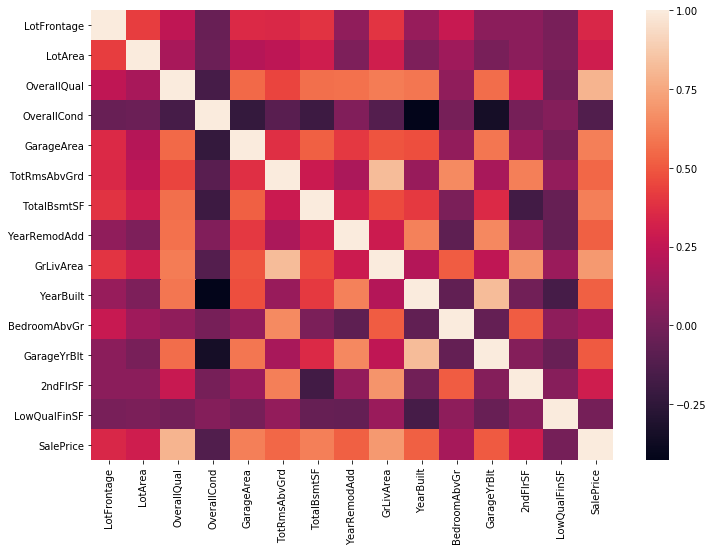

In [540]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(train_houses_not_null.corr(),ax=ax)

print("Heatmap for the correlation co-efficients")

Discuss most positive and negative correlations.

Most Positive Correlations:


1) YearBuilt__GarageYrBlt      0.824558

This correlation tells us that the earlier the house was built, the earlier they built the garage. 
Most of the houses have the garage when the house was itself built. I subtracted the year the house was built from the year the garage was built. Most of the values were 0, which means that the garage was built when the house was built. 

One interesting thing I found out while taking the difference of the years was that some differences were negative. This means that the garage was built earlier than the house. It may possibly be a mistake or the garage was built first and then it was extended to a house!

2) OverallQual__SalePrice      0.799069

Even this should not come as a surprise as this is the expected behaviour. The better the quality of the house, the higher will be its sale price. The scatter plot for this can be seen below. One interesting thing to note here is that each overall quality has some range of Sale Price. And that range keeps on increasing as we increase the overall quality. For example, 'Overall Quality' --> 2 has a range of Sale Price somewhere between 10,000 - 90,000, 'Overall Quality' --> 3 has a range of Sale Price of 50,000 t o 1,30,000. The ranges for overall quality are overlapping, but the maximum value of 'Sale Price' for each 'Overall Quality' is increasing linearly.

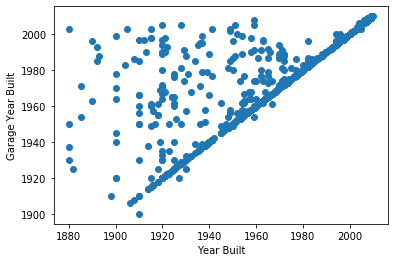

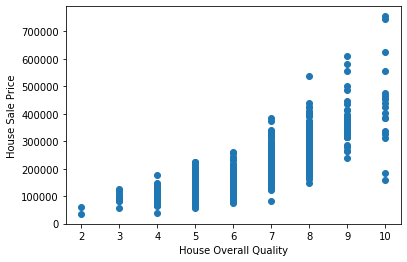

In [546]:
plt.scatter(train_houses_not_null['YearBuilt'], train_houses_not_null['GarageYrBlt'])
plt.xlabel('Year Built')
plt.ylabel('Garage Year Built')
plt.show()


plt.scatter(train_houses_not_null['OverallQual'], train_houses_not_null['SalePrice'])
plt.xlabel('House Overall Quality')
plt.ylabel('House Sale Price')
plt.show()


Most negative correlations:

1) OverallCond__YearBuilt     -0.426921

This correlation tells us that the earlier the house was built, the overall condition deteriorated Although, it's not a strong correlation. This can be explained by the fact the house was also remodelled.  This is proven by the fact that 'YearRemodAdd' and 'OverallQual' of the house is correlated nicely at 0.57. The year in which the house was remodeled is given by the column 'YearRemodAdd'.

2) OverallCond__GarageYrBlt   -0.343965

This correlation tells us about the relation between the overall condition of the house and the year the garage was built in. The older the garage, the bad the condition of the house.

The scatter plots for both of these negative correlations can be seen below.

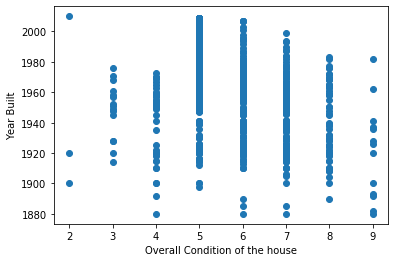

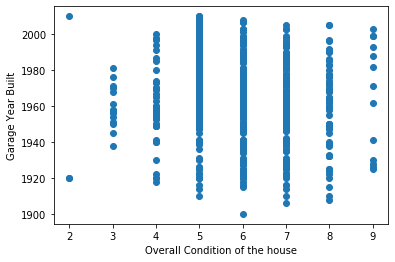

In [80]:
plt.scatter(train_houses_not_null['OverallCond'], train_houses_not_null['YearBuilt'])
plt.xlabel('Overall Condition of the house')
plt.ylabel('Year Built')
plt.show()

plt.scatter(train_houses_not_null['OverallCond'], train_houses_not_null['GarageYrBlt'])
plt.xlabel('Overall Condition of the house')
plt.ylabel('Garage Year Built')
plt.show()

## Part 2 - Informative Plots

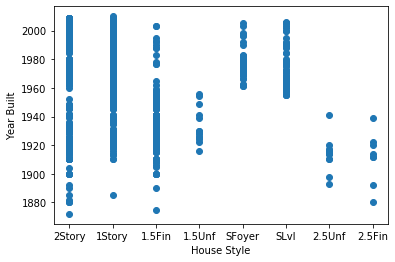

In [567]:
# code to generate Plot 1

# Scatter Plot of House Style v/s Year Built 
plt.scatter(train_houses['HouseStyle'], train_houses['YearBuilt'])
plt.xlabel('House Style')
plt.ylabel('Year Built')
plt.show()

What interesting properties does Plot 1 reveal?

The most interesting properties that the Plot 1 reveal are the ranges of years for which a particular house style was in fashion in Ames, Iowa.

The most popular version of the house people preferred in Ames was 2Story building.

For example, the construction for 2Story house style began way back in 1800s and it was built evenly till late 2000s .

There were a few instances of 1Story buildings in 1880's and then the construction of 1Story buildings stopped until 1910s
and then again it was built regularly.

The most rare house styles are 1.5Unf, 2.5Unf and 2.5Fin. They were present on on-off basis. 

It would be pretty interesting to know the reasons behind why such patterns are observed. Why the construction of a particular house style was relevant only for a particular period of time. It may reveal some very interesting back-stories.


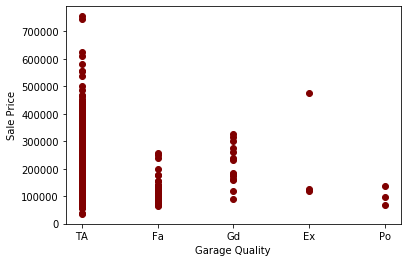

In [582]:
# code to generate Plot 2

# Scatter plot of Garage Quality vs Sale Price
garagequal_saleprice_notnull = train_houses[['GarageQual', 'SalePrice']].dropna(axis=0, how='any')
plt.scatter(garagequal_saleprice_notnull['GarageQual'], garagequal_saleprice_notnull['SalePrice'], color='maroon')
plt.xlabel('Garage Quality')
plt.ylabel('Sale Price')
plt.show()


What interesting properties does Plot 2 reveal?

TA - Typical
Fa - Fair
Gd - Good
Ex - Excellent
Po - Poor
Plot 2 reveals that SalePrice is dependent on Garage Quality but not too much. We can conclude this by seeing that Poor garage quality houses have SalePrice mostly on the lower side of the spectrum. Fair, which is a grade higher than Poor, has slight higher values of SalePrice. Good garage quality has slightly higher range of values than Fair. 

But one interesting thing to note here is that Typical Garage quality is distributed nicely among all the SalePrices and most of the data points are in the typical garage quality bracket. This tells us that once the Garage Quality reaches a level of Typical, the customer does not focus much on it. He will look for other features. But, if the garage quality is below typical, like Poor or Fair, it may affect the price of the house severely and negatively. 

This tells us the subtlety or the nuance of the effect of Garage Quality on SalePrice.

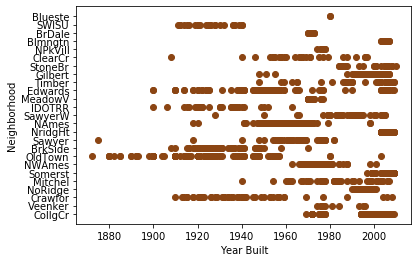

In [581]:
# code to generate Plot 3

# Scatter plot of Neighborhood v/s the year the houses were built there.
plt.scatter(train_houses['YearBuilt'], train_houses['Neighborhood'],color='saddlebrown')
plt.xlabel('Year Built')
plt.ylabel('Neighborhood')
plt.show()

What interesting properties does Plot 3 reveal?

Plot 3 reveals interesting things about the year the neighborhood was developed in the city of Ames. We can find out the recently developed neighborhoods and the neighborhoods which were developed quite early. 

For example, Old Town neighborhood has construction started quite early in 1800s. Blmngtn is a new neighborhood which started with first house being constructed in around 2000s.

There are some areas in which the construction started and continued for a few years or decades and then stopped for decades and then restarted again.

It would be interesting to know the reasons behind these gaps. And the reasons behind those gaps could lead to some interesting analysis.

                  SalePrice
Neighborhood               
MeadowV        98576.470588
IDOTRR        100123.783784
BrDale        104493.750000
BrkSide       124834.051724
Edwards       128219.700000


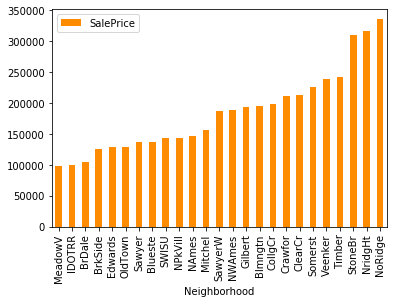

In [580]:
# code to generate Plot 4

# Bar graph of neighborhood v/s mean SalePrice
new_data = pd.read_csv('C:/Fall2019/DSF/Assignment2/Data/train.csv')
new_data.Neighborhood.head()
groupby_neighborhood = new_data[['Neighborhood', 'SalePrice']]

neighborhoods = new_data.Neighborhood.unique().tolist()
#neighborhoods_list = neighborhoods.values().tolist()
groupby_neighborhood.shape
ng = groupby_neighborhood.groupby('Neighborhood').mean()
ng = ng.sort_values(by='SalePrice')
print(ng.head())
plot1 = (ng).plot(kind='bar', color='darkorange')
fig= plt.figure(figsize=(6,3))

What interesting properties does Plot 4 reveal?

This line chart reveals the relation between the Neighborhood and the Sale Price. 

                SalePrice
MSSubClass               
30           95829.724638
180         102300.000000
45          108591.666667
190         129613.333333
90          133541.076923


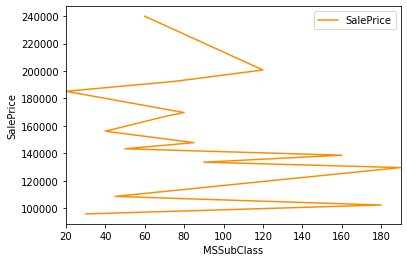

In [609]:
# code to generate Plot 5

# Line Graph of MSSubClass v/s SalePrice

MSSubClasses = train_houses.MSSubClass.unique().tolist()
MSSub = train_houses[['MSSubClass', 'SalePrice']]
mg = MSSub.groupby('MSSubClass').mean()
mg = mg.sort_values(by='SalePrice')
print(mg.head())
plot1 = (mg).plot(color='darkorange')
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.show()

What interesting properties does Plot 5 reveal?

This plot shows the average SalePrice for a group of MSSubClass.

## Part 3 - Handcrafted Scoring Function

In [274]:
# TODO: code for scoring function

# Finding correlation between ordinal variables and sale price
ordinal_saleprice = train_houses[['ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu' , 'GarageQual',
 'GarageCond', 'SalePrice']]
mapper = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
new_ordinal_saleprice = ordinal_saleprice.replace(mapper)
new_ordinal_saleprice.fillna(0, inplace=True)

corr1 = new_ordinal_saleprice.corr()
# print(corr1)
house_score_columns = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea','TotRmsAbvGrd','ExterQual','KitchenQual','SalePrice']
house_score_exterqual_ordinal = train_houses[house_score_columns].replace(mapper)
house_score_exterqual_ordinal.fillna(0, inplace=True)
house_score_exterqual_ordinal.head()
corr = house_score_exterqual_ordinal.corr()

corr_saleprice_values = corr['SalePrice'].tolist()
corr_saleprice_values.pop()

# print(corr_saleprice_values)

weights = []
sum = 0
for idx in range(len(corr_saleprice_values)):
    sum+=corr_saleprice_values[idx]

for idx in range(len(corr_saleprice_values)):
    weights.append(corr_saleprice_values[idx]/sum)
    
house_score_saleprice_dropped = house_score_exterqual_ordinal.drop(columns=['SalePrice'])

# Calculate the maximum possible score
max_score = 0
max_columns = house_score_exterqual_ordinal.max()

max_columns_list = max_columns.tolist()

# Removing the SalePrice column
max_columns_list.pop()

# Find the maximum score possible by multiplying the maximum value in each column with its weight
for index in range(len(max_columns_list)):
    max_score+=max_columns_list[index]*weights[index]
    
column_index = 0;
scores = []
for row in house_score_saleprice_dropped.iterrows():
    score = 0
    for column_index in range(len(weights)):
        score+=row[1][column_index]*weights[column_index]
    score = (score*100)/max_score
    scores.append(score)

house_score_exterqual_ordinal['score'] = scores
house_score_sorted = house_score_exterqual_ordinal.sort_values(by=['score'],ascending=False)
house_score_sorted.insert(0, 'Id', train_houses[['Id']])
display(house_score_sorted.head(10))
print("Ten most desirable houses")


Id_SalePrice_Score = house_score_sorted[['Id', 'SalePrice', 'score']]
display(Id_SalePrice_Score. head(10))
# train_houses['score'] = scores
# train_houses_sorted = train_houses.sort_values(by=['score'], ascending=False)

# Fetching the 10 most desirable houses
# train_houses_sorted.head(10)

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,TotRmsAbvGrd,ExterQual,KitchenQual,SalePrice,score
1298,1299,10,2008,6110,5642,1418,12,5,5,160000,99.978223
523,524,10,2007,3138,4676,884,11,5,5,184750,70.691236
1182,1183,10,1996,2396,4476,813,10,4,5,745000,64.011294
691,692,10,1994,2444,4316,832,10,5,5,755000,63.264750
496,497,8,1992,3200,3228,546,10,4,4,430000,58.221686
1169,1170,10,1995,1930,3627,807,10,4,4,625000,54.814496
440,441,10,2008,3094,2402,672,10,5,5,555000,52.445614
1373,1374,10,2001,2633,2633,804,8,5,5,466500,52.016900
1353,1354,8,1995,2033,3238,666,9,4,4,410000,51.697533
798,799,9,2008,1926,3140,820,11,5,5,485000,51.397749


Ten most desirable houses


,Id,SalePrice,score
1298,1299,160000,99.978223
523,524,184750,70.691236
1182,1183,745000,64.011294
691,692,755000,63.264750
496,497,430000,58.221686
1169,1170,625000,54.814496
440,441,555000,52.445614
1373,1374,466500,52.016900
1353,1354,410000,51.697533
798,799,485000,51.397749


What is the ten most desirable houses?

The IDs of the ten most desirable houses ( as can be seen in the table above with all column values ) are:

Id	   SalePrice	score
1299	160000	  99.978223
 524	184750	  70.691236
1183	745000	  64.011294
 692	755000	  63.264750
 497	430000	  58.221686
1170	625000	  54.814496
 441	555000	  52.445614
1374	466500	  52.016900
1354	410000	  51.697533
 799	485000	  51.397749

In [272]:
# Fetching the 10 least desirable houses
house_score_sorted_ascending = house_score_exterqual_ordinal.sort_values(by=['score'])
house_score_sorted_ascending.insert(0, 'Id', train_houses[['Id']])
display(house_score_sorted_ascending.head(10))
print("Ten least desirable houses")

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,TotRmsAbvGrd,ExterQual,KitchenQual,SalePrice,score
533,534,1,1946,0,334,0,2,2,2,39300,12.971542
1100,1101,2,1920,290,438,246,3,3,2,60000,17.025584
1218,1219,4,1947,0,912,0,3,3,3,80500,17.241422
710,711,3,1935,270,729,0,5,4,3,52000,17.557500
1321,1322,3,1949,0,720,287,4,3,3,72500,17.691305
636,637,2,1936,264,800,0,4,2,2,60000,18.008895
528,529,4,1920,528,605,0,5,3,3,86000,18.203606
1323,1324,4,1940,420,708,0,5,2,2,82500,18.366807
705,706,4,1930,0,1092,0,7,2,2,55000,18.472395
1035,1036,4,1957,0,845,290,5,3,3,84000,18.680118


Ten least desirable houses


What is the ten least desirable houses?

The IDs of the ten least desirable houses ( as can be seen in the table above with all column values ) are:

Id	   SalePrice	score

 534	39300	12.971542
1101	60000	17.025584
1219	80500	17.241422
 711	52000	17.557500
1322	72500	17.691305
 637	60000	18.008895
 529	86000	18.203606
1324	82500	18.366807
 706	55000	18.472395
1036	84000	18.680118

Describe your scoring function and how well you think it worked.

The notion of desirability was attached to the sense of cost. 
So, for the scoring function, I used the correlation matrix that I prepared in question 1 and saw which correlations with 'Sale Price' were the most significant among all the variables. I selected those variables to be used in the scoring function. For negative correlations, I was not getting significant enough correlation with 'Sale Price'. The highest negative correlation was around -0.42. Hence, I decided not to use the negative correlations. 

The variables which were selected based on the correlation with 'Sale Price' are:

    Variable            Correlation with SalePrice
    
1) OverallQual                   0.790982 
2) YearBuilt                     0.522897
3) TotalBsmtSF                   0.613581
4) GrLivArea                     0.708624
5) GarageArea                    0.623431
6) TotRmsAbvGrd                  0.533723
7) ExterQual                     0.682639
8) KitchenQual                   0.659600  

The last two variables 'ExterQual' and 'KitchenQual' were ordinal variables and converted to numerical values by mapping the following:
{'Excellent': 5, 'Good' : 4,'Typical' : 3, 'Fair':2, 'Poor':1, 'NA':0} 

The scoring functions calculates a weight to be given to each variable depending upon the extent of its correlation with the SalePrice. It then calculates the total score for a particular row by multiplying the weights of the column with the column value. 

The maximum possible score is calculated and then each score is divided by the maximum possible score and multiplied by a 100 to obtain a normalized score out of 100. 

If you have a look at the table for the most desirable houses, the top desirable house (ie ID: 1299 sits comfortably at the top with a normalized score of 99.97 and the second position is at 70.69
This is because of the excellent values of the variables of that particular house. The rest of the 9 houses are the ones who have the highest SalePrice among the whole data. So, I would say that the scoring function works pretty well.

If you have a look at the 10 least desirable houses, they have terrible values of the variables and these things are eventually reflected in their ultimate price. The Sale Price of the house are among the lowest in the whole dataset.

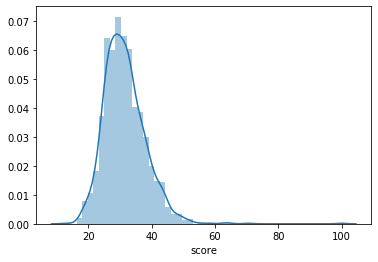

In [278]:
# The distribution of the scoring function can be plotted as below
# Most of our houses have a score of 20-60 and there are very few houses which are above 60.
sns.distplot(house_score_sorted_ascending['score'])

## Part 4 - Pairwise Distance Function

Here, we need to find homes that are similar to each other. This means that homes that are of similar make, similar exterior material, similar lot shape, building type, house style and many more properties of the house. We will ignore the attributes of the house such as quality of garage, overall quality, fireplace quality as such variables are not dependent on the neighborhood. Same quality of the houses can be found in different neighborhoods. We will only consider the variables that are related to physical properties of the house.  


For assigning distances between a pair of categorical variable values, we will first label encode the categorical variables and then one hot encode it.

In [642]:
#  code for distance function
# For each categorical column
# We fit a label encoder, transform our column and 
# add it to our new dataframe
cat_columns = {'MSSubClass', 'MSZoning', 'Street', 'Condition1', 'Condition2', 'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','Electrical','GarageType'}
dist_houses = train_houses[['Id', 'Neighborhood']]
train_houses_dist = train_houses[['Id', 'Neighborhood', 'MSSubClass', 'MSZoning', 'Street', 'Condition1', 'Condition2', 'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','Electrical','GarageType']]

train_houses_dist = train_houses_dist.dropna(how='any')
display(train_houses_dist.shape)

    
train_houses_dist.head()
train_houses_dist_ohe = train_houses_dist[['MSSubClass', 'MSZoning', 'Street', 'Condition1', 'Condition2', 'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','Electrical','GarageType']]

distance_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea','GarageArea']
distance_data = train_houses[distance_cols]
distance_data.fillna(0, inplace=True)
from sklearn.metrics.pairwise import euclidean_distances


# Calculating the Euclidian distances between two rows in the data
eu_dist = euclidean_distances(distance_data, distance_data)

# getting the normalized euclidian distances

origin = [[0 for i in range(len(eu_dist[0]))] for j in range(len(eu_dist))]
eu_dist_norm = euclidean_distances(eu_dist,origin)

print(eu_dist_norm)

(1378, 17)

C:\Users\rutvi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


[[390036.26774442 390036.26774442 390036.26774442 ... 390036.26774442
  390036.26774442 390036.26774442]
 [383599.423876   383599.423876   383599.423876   ... 383599.423876
  383599.423876   383599.423876  ]
 [383074.67415114 383074.67415114 383074.67415114 ... 383074.67415114
  383074.67415114 383074.67415114]
 ...
 [387385.43792456 387385.43792456 387385.43792456 ... 387385.43792456
  387385.43792456 387385.43792456]
 [383562.17986136 383562.17986136 383562.17986136 ... 383562.17986136
  383562.17986136 383562.17986136]
 [382717.60433249 382717.60433249 382717.60433249 ... 382717.60433249
  382717.60433249 382717.60433249]]


In [626]:
print(eu_dist)

[[   0.         1237.70028682 2801.67610548 ...  915.87389962
  1449.96379265 1578.86446537]
 [1237.70028682    0.         1737.74250106 ... 1232.12539946
   311.07073151  384.19656427]
 [2801.67610548 1737.74250106    0.         ... 2304.89045293
  1728.98178128 1454.7982678 ]
 ...
 [ 915.87389962 1232.12539946 2304.89045293 ...    0.
  1431.25748906 1406.1699755 ]
 [1449.96379265  311.07073151 1728.98178128 ... 1431.25748906
     0.          285.75164042]
 [1578.86446537  384.19656427 1454.7982678  ... 1406.1699755
   285.75164042    0.        ]]


How well does the distance function work? When does it do well/badly?

I have calculated the Distance matrix between some of the variables. The notion of distance is attached to the neighborhood. Houses in the same neighborhood are similar and hence tend to have a less distance between them. 

## Part 5 - Clustering

,MSSubClass,MSZoning,Street,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,Electrical,GarageType
0,60,RL,Pave,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd
1,20,RL,Pave,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,CBlock,GasA,SBrkr,Attchd
2,60,RL,Pave,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd
3,70,RL,Pave,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkTil,GasA,SBrkr,Detchd
4,60,RL,Pave,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd


array([10, 10,  0, ..., 10, 10, 10], dtype=int64)

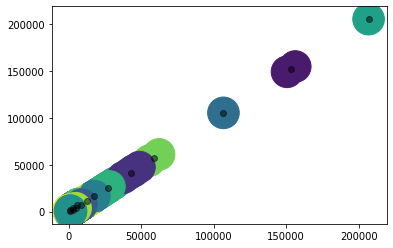

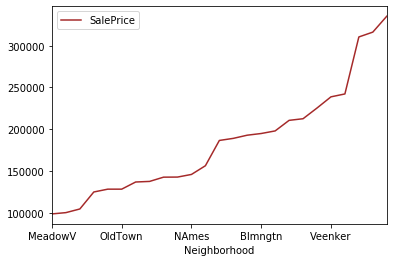

<Figure size 432x216 with 0 Axes>

In [647]:
#code for clustering and visualization

display(train_houses_dist_ohe.head())
ohe_dist_houses = pd.get_dummies(train_houses_dist_ohe)
ohe_dist_houses.shape

ohe_dist_houses_with_ids_neighbors = pd.concat([dist_houses, ohe_dist_houses], axis=1)

# Agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward')
display(cluster.fit_predict(distance_data))


# k means clustering
kmeans = KMeans(n_clusters=15)
kmeans.fit(eu_dist)
y_kmeans = kmeans.predict(eu_dist)

plt.scatter(eu_dist[:,0], eu_dist[:,1], c=y_kmeans, s=1000,cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5);


new_data_1 = pd.read_csv('C:/Fall2019/DSF/Assignment2/Data/train.csv')
groupby_neighborhood_1 = new_data[['Neighborhood', 'SalePrice']]

neighborhoods_1 = new_data_1.Neighborhood.unique().tolist()
ng1 = groupby_neighborhood.groupby('Neighborhood').mean()
ng1 = ng.sort_values(by='SalePrice')
plot1 = (ng1).plot(color='brown')
fig= plt.figure(figsize=(6,3))

How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.

I have applied agglomerative and k means clustering. The boundaries were reflected more clearly in the k means clustering algorithm.
I have taken the number of clusters to be 15 for optimal performance of k means clustering. The number of possible neighborhoods is 25. Hence, all boundaries of neighborhood may not be reflected clearly here.

The plot above is highly reflective of 'Neighborhood' and the mean 'SalePrice'. 
So, the points lying around 0-50000 are the ones which have that SalePrice in that range and the cheapest neighborhood is reflected in those points. 

The two plots above can be compared and the points lying cloesest to the origin are the points in the neighborhood closest to the origin. And so on.

## Part 6 - Linear Regression

In [472]:
#  code for linear regression

# We will use those variables for predicting the sale price which have the highest correlation with the SalePrice variable.
house_score_exterqual_ordinal_neighbors['logSalePrice'] = np.log(house_score_exterqual_ordinal_neighbors['SalePrice'])
X = house_score_exterqual_ordinal_neighbors[['OverallQual', 'YearBuilt' , 'GrLivArea', 'GarageArea','ExterQual','KitchenQual', 'Neighborhood']]
y = house_score_exterqual_ordinal_neighbors[['logSalePrice']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=0)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

accuracy = regr.score(X_test, y_test)
#print(accuracy)

# Prints the r2 score for the linear regression model

print(r2_score(y_test, y_pred))

test_file = pd.read_csv('C:/Fall2019/DSF/Assignment2/Data/test.csv')
test_file_variables = test_file[['OverallQual', 'YearBuilt' , 'GrLivArea', 'GarageArea','ExterQual','KitchenQual','Neighborhood']]
mapper = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}

test_file_variables_ordinal = test_file_variables.replace(mapper)
test_file_variables_ordinal_neighbor = test_file_variables_ordinal.replace(neighbor_mapper)
test_file_variables_ordinal_neighbor.fillna(0, inplace=True)
test_file_predict = regr.predict(test_file_variables_ordinal_neighbor)


sampleSubmission = pd.read_csv("C:/Fall2019/DSF/Assignment2/Data/sample_submission.csv")
sampleSubmission['SalePrice'] = np.exp(test_file_predict)

sampleSubmission.to_csv("C:/Fall2019/DSF/Assignment2/Data/sampleSubmission1.csv")
sampleSubmission.shape


(15, 1)

15
0.9267547638773315


(1459, 2)

In [439]:
# Converting the categorical nominal variable 'Neighborhood' to ordinal variable according to the mean of the SalePrice

neighborhood = train_houses[['Neighborhood','SalePrice']]
neighborGroupBy = neighborhood.groupby(by='Neighborhood').mean()
#print(neighborGroupBy)
neighborGroupBy.sort_values(by='SalePrice')
neighbor_mapper = {'MeadowV':1,
'IDOTRR':2,
'BrDale':3,
'BrkSide':4,
'Edwards':5,
'OldTown':6,
'Sawyer':7,
'Blueste':8,
'SWISU':9,
'NPkVill':10,
'NAmes':11,
'Mitchel':12,
'SawyerW':13,
'NWAmes':14,
'Gilbert':15,
'Blmngtn':16,
'CollgCr':17,
'Crawfor':18,
'ClearCr':19,
'Somerst':20,
'Veenker':21,
'Timber':22,
'StoneBr':23,
'NridgHt':24,
'NoRidge':25}

house_score_exterqual_ordinal['Neighborhood'] = train_houses[['Neighborhood']]
house_score_exterqual_ordinal_neighbors = house_score_exterqual_ordinal.replace(neighbor_mapper)
display(house_score_exterqual_ordinal_neighbors.head())

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,TotRmsAbvGrd,ExterQual,KitchenQual,SalePrice,score,Neighborhood
0,7,2003,856,1710,548,8,4,4,208500,32.369067,17
1,6,1976,1262,1262,460,6,3,3,181500,30.920918,21
2,7,2001,920,1786,608,6,4,4,223500,33.692386,17
3,7,1915,756,1717,642,7,3,4,140000,31.905077,18
4,8,2000,1145,2198,836,9,4,4,250000,39.607575,25


How well/badly does it work? Which are the most important variables?

So, I experimented with many variables. Mostly numerical variables which has a significant correlation with the SalePrice. 
In the end, I got to know the significance of the neighborhood with the SalePrice as this is true in most parts of the world. For example, prices of houses in Manhattan will definitely be higher than that of houses in Stony Brook!
So, I included neighborhood in the linear regression model for prediction.

## Part 7 - External Dataset

In [598]:
# code to import external dataset and test

ownership_rate = pd.read_csv('C:/Fall2019/DSF/Assignment2/Data/IAHOWN.csv')
ownership_rate['DATE'] = pd.to_datetime(ownership_rate['DATE'])
ownership_rate['DATE'] = ownership_rate['DATE'].dt.year
display(ownership_rate.head())

house_with_yr_sold = house_score_exterqual_ordinal_neighbors
house_with_yr_sold['YrSold'] = train_houses['YrSold']
merged = pd.merge(house_with_yr_sold, ownership_rate, left_on = 'YrSold', right_on = 'DATE')
display(merged.head())

X_merged = merged[['OverallQual', 'YearBuilt' , 'GrLivArea', 'GarageArea','ExterQual','KitchenQual', 'Neighborhood', 'IAHOWN']]
y_merged = merged[['logSalePrice']]
X_merged_train,X_merged_test,y_merged_train,y_merged_test=train_test_split(X_merged,y_merged,test_size=0.01,random_state=0)
regr_merged = linear_model.LinearRegression()
regr_merged.fit(X_merged_train, y_merged_train)

y_pred_merged = regr_merged.predict(X_merged_test)

#print(accuracy)

# Prints the r2 score for the linear regression model
print("Accuracy after merging the external data: ")
print(r2_score(y_merged_test, y_pred_merged))
print('')
print("Accuracy before merging the external data: ")
print('0.92675')

,DATE,IAHOWN
0,1984,71.3
1,1985,69.9
2,1986,69.2
3,1987,67.7
4,1988,68.3


,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,TotRmsAbvGrd,ExterQual,KitchenQual,SalePrice,score,Neighborhood,logSalePrice,LandContour,LotConfig,LandSlope,Condition1,Condition2,YrSold,DATE,IAHOWN
0,7,2003,856,1710,548,8,4,4,208500,32.369067,17,12.247694,3,4,0,2,2,2008,2008,74.0
1,7,2001,920,1786,608,6,4,4,223500,33.692386,17,12.317167,3,4,0,2,2,2008,2008,74.0
2,8,2000,1145,2198,836,9,4,4,250000,39.607575,25,12.429216,3,2,0,2,2,2008,2008,74.0
3,7,1931,952,1774,468,8,3,3,129900,32.527662,6,11.774520,3,4,0,0,0,2008,2008,74.0
4,5,1939,991,1077,205,5,3,3,118000,26.005276,4,11.678440,3,0,0,0,0,2008,2008,74.0


Accuracy after merging the external data: 
0.8656861406433914

Accuracy before merging the external data: 
0.92675


Describe the dataset and whether this data helps with prediction.

There is a dataset of Homeownership Rate for the state of Iowa, which I found on FRED Economic Data website (https://fred.stlouisfed.org)

This dataset talks about the rate of ownership of the houses inthe state of Iowa for a particular year starting from the year of 1984 up until 2018.

I integrated this dataset in my train data to check whether the ownership rate of the houses affected the sale price or not.
Ideally, the homeownership rate should affect the SalePrice of the house as more the ownership rate of the year, more the people are buying the houses and more the demand and SalePrice should increase proportionally.

In the external dataset, first I extracted the year from the date provided.
Then, I merged the two tables based on year provided in the external dataset and the year the house was sold in the original data which makes sense because we would check the home ownership rate only while buying the house.

As we can see from the code above that the accuracy of the simple linear regression model decreases from approx. 0.92 to 0.86 after we merge the external data with the original data, we would not be using it for further prediction as this will only become a hindrance for us in predicting good values.

So, this data clearly does not help with the prediction.

## Part 8 - Permutation Test

In [583]:
# Create a redundant data frame for doing permutation tests and add all the permutation columns in it
permutation_df = house_score_exterqual_ordinal_neighbors

# Meaningless variables to be included for permutation tests = LandContour, LotConfig, LandSlope, Condition1, Condition2
permutation_df['LandContour'] = train_houses['LandContour']
permutation_df['LotConfig'] = train_houses['LotConfig']
permutation_df['LandSlope'] = train_houses['LandSlope']
permutation_df['Condition1'] = train_houses['Condition1']
permutation_df['Condition2'] = train_houses['Condition2']

permutation_df.fillna(0,inplace=True)

le_LandContour = preprocessing.LabelEncoder()
le_LotConfig = preprocessing.LabelEncoder()
le_LandSlope = preprocessing.LabelEncoder()
le_Condition1 = preprocessing.LabelEncoder()
le_Condition2 = preprocessing.LabelEncoder()
permutation_df['LotConfig'] = le_LotConfig.fit_transform(permutation_df['LotConfig'])
permutation_df['LandContour'] = le_LandContour.fit_transform(permutation_df['LandContour'])
permutation_df['LandSlope'] = le_LandSlope.fit_transform(permutation_df['LandSlope'])
permutation_df['Condition1'] = le_Condition1.fit_transform(permutation_df['Condition1'])
permutation_df['Condition2'] = le_Condition2.fit_transform(permutation_df['Condition1'])

Automatically created module for IPython interactive environment
Column:  OverallQual


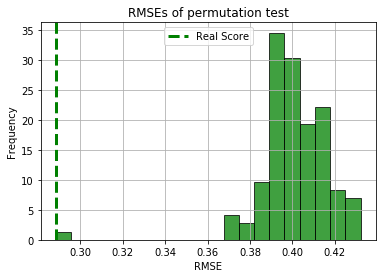

PValue with column : OverallQual
0.0



Column:  GrLivArea


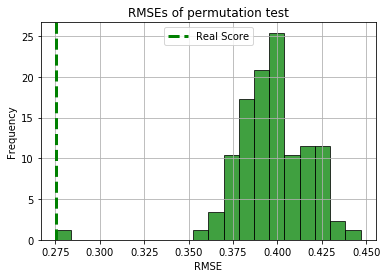

PValue with column : GrLivArea
0.0



Column:  GarageArea


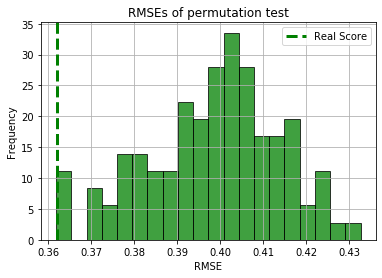

PValue with column : GarageArea
0.01



Column:  ExterQual


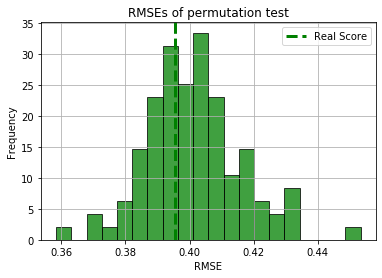

PValue with column : ExterQual
0.347



Column:  KitchenQual


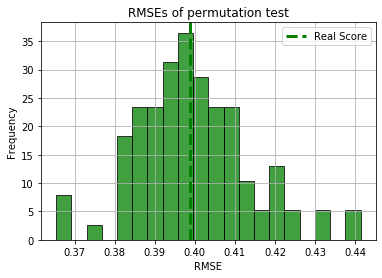

PValue with column : KitchenQual
0.505



Column:  LandContour


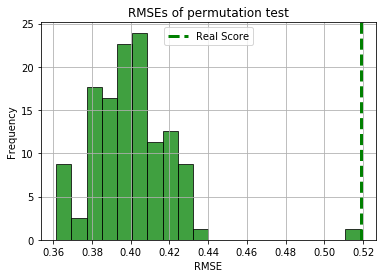

PValue with column : LandContour
0.99



Column:  LotConfig


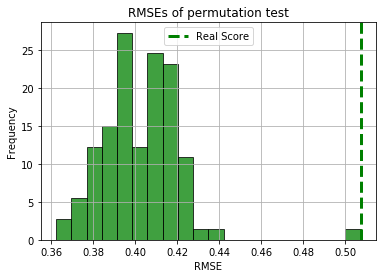

PValue with column : LotConfig
0.99



Column:  LandSlope


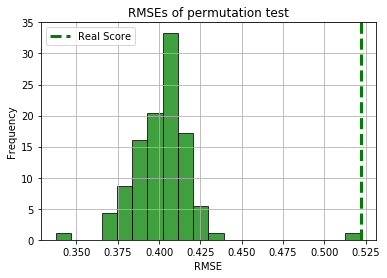

PValue with column : LandSlope
0.99



Column:  Condition1


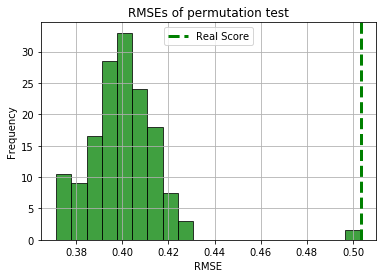

PValue with column : Condition1
0.99



Column:  Condition2


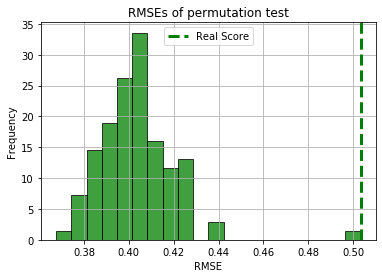

PValue with column : Condition2
0.99





In [532]:
# TODO: code for all permutation tests

# Variables selected for p test:
# Meaningful
    # 'OverallQual',
    # 'GrLivArea', 
    # 'GarageArea',
    # 'ExterQual',
    # 'KitchenQual',
    
# Meaningless
    # 'LandContour',
    # 'LotConfig', 
    # 'LandSlope', 
    # 'Condition1', 
    # 'Condition2'

# A simple function to return random permutation of the data
def permute(df):
    df = df.copy()
    df.apply(np.random.shuffle)
    return df

permutation_columns = ['OverallQual', 'GrLivArea', 'GarageArea', 'ExterQual', 'KitchenQual','LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2']
X_whole = house_score_exterqual_ordinal_neighbors[['OverallQual','GrLivArea', 'GarageArea','ExterQual','KitchenQual','LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2']]
y_whole = house_score_exterqual_ordinal_neighbors[['logSalePrice']]

# iterate through all the columns selected for permutation testing 
# Prepare the training data for that single column only by taking 100 random permutations
# Perform simple linear regression for that column
# Calculate the Root of Mean Square Error (RMSE)
# Append the 100 values of RMSE in a list
for col in permutation_columns:
    rmse_perm = []
    print("Column: ", col)
    for _ in range(100):
        
        X_perm = permute(X_whole[[col]])
        y_perm = permute(y_whole)
        X_train_perm,X_test_perm,y_train_perm,y_test_perm=train_test_split(X_perm,y_perm,test_size=0.25,random_state=0)
        regr_perm = linear_model.LinearRegression()
        regr_perm.fit(X_train_perm, y_train_perm)
        y_pred_perm = regr_perm.predict(X_test_perm)
        rms = np.sqrt(mean_squared_error(y_test_perm, y_pred_perm))
        rmse_perm.append(rms)

    # Train the model with the real values of the data 
    X_train_real,X_test_real,y_train_real,y_test_real = train_test_split(X_whole[[col]],y_whole,test_size=0.01,random_state=0)
    # with sklearn
    regr_real = linear_model.LinearRegression()
    regr_real.fit(X_train_real, y_train_real)
    y_pred_real = regr_real.predict(X_test_real)
    rms_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
    
    # append the real result to the rmse list
    rmse_perm.append(rms_real)
    
    # Plot the graphs for 10 different columns RMSEs and highlight the RMSE of the real data
    n, bins, patches = plt.hist(rmse_perm, 20, density=True, facecolor='g', alpha=0.75, edgecolor='black')
    ylim = plt.ylim()
    plt.plot(2 * [rmse_perm[100]], ylim, '--g', linewidth=3,
             label='Real Score')
    plt.ylim(ylim)
    plt.legend()
    plt.xlabel('Score')
    plt.xlabel('RMSE')
    plt.ylabel('Frequency')
    plt.title('RMSEs of permutation test')
    plt.grid(True)
    plt.show()
    
    # Get the pvalue from the permutation scores 
    rmse_perm.sort()
    pos = rmse_perm.index(rms_real)
    pvalue = pos/101
    print("PValue with column :", col)
    pvalue = round(pvalue, 3)
    print(pvalue)
    
    # Added to print new lines between plots 
    print('')
    print('')
    print('')
    

Permutation test results description



The first 3 meaningful variables such as OverallQual, GarageArea , GrLivArea have very low pvalues almost equal to 0.00 which means that they are highly correlated to the SalePrice and hence it is statistically significant

The next 2 variables ie KitchenQual and ExterQual, which we considered to be quite meaningful ended up have a pvalue of 0.505 and 0.347 which means that they may not be as astatistically significant as we thought them to be.

The meaningless variables have very high pvalues of 0.99 which means that our intuition was right and those variables are actually statistically insignificant and meaningless with respect to the prediction of the SalePrice.

Describe the results.

XGBoost Model

In [ ]:
# XGBoost Model

model = XGBRegressor(n_estimators = 1000, #100-1000
    learning_rate = 0.01, #increase while decreasing n_trees
    max_depth = 5, #increase incrementally by 1; default 6, increasing can lead to overfit
    colsample_bytree = 0.3, # 0.3 to 0.8
    gamma = 0) #0, 1 or 5

model.fit(X_train, y_train)
xgb_preds = model.predict(X_test) #store the predictions for xgbregressor
rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
print(rmse)


test_file_predict2 = model.predict(test_file_variables_ordinal_neighbor)


sampleSubmission2 = pd.read_csv("C:/Fall2019/DSF/Assignment2/Data/sample_submission.csv")
sampleSubmission2['SalePrice'] = np.exp(test_file_predict2)

sampleSubmission2.to_csv("C:/Fall2019/DSF/Assignment2/Data/sampleSubmission2.csv")
sampleSubmission2.shape
print(len(xgb_preds))

Kernel Ridge Regression Model

In [ ]:
# Kernel Ridge Regression:

clf = KernelRidge(alpha=1.0)
clf.fit(X_train, y_train) 

test_file_predict3 = clf.predict(test_file_variables_ordinal_neighbor)


sampleSubmission3 = pd.read_csv("C:/Fall2019/DSF/Assignment2/Data/sample_submission.csv")
sampleSubmission3['SalePrice'] = np.exp(test_file_predict3)

sampleSubmission3.to_csv("C:/Fall2019/DSF/Assignment2/Data/sampleSubmission3.csv")
sampleSubmission3.shape
print(len(test_file_predict3))

Lasso Regression

In [ ]:
# Lasso Regression

clf2 = linear_model.Lasso(alpha=0.1)
clf2.fit(X_train, y_train)

test_file_predict4 = clf2.predict(test_file_variables_ordinal_neighbor)


sampleSubmission4 = pd.read_csv("C:/Fall2019/DSF/Assignment2/Data/sample_submission.csv")
sampleSubmission4['SalePrice'] = np.exp(test_file_predict4)

sampleSubmission4.to_csv("C:/Fall2019/DSF/Assignment2/Data/sampleSubmission4.csv")

Comparison of Different Models

1) Linear Regression Model: (done in 6th question)

This model did not perform very well as expected. Linear Regression model just finds the linear relationship between the independent variables and the dependent variable. When I uploaded the results to Kaggle, I was getting a score of 0.1924

2) XGBoost Model:

This model improved the model significantly and gave the Kaggle score of 0.1349 and a rank of 2234. This was the best performing model out of all the four models.

3) Kernel Ridge Regression: 

This model did not give much accuracy as compared to other models. It gave Kaggle score of 0.3675. 

4) Lasso Regression:

This model performed on the same lines as that of baseline Linear Regression and gave the accuracy of around 0.2138

Hence, XGBoost gives the best result for the prediction of the test task.


## Part 9 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/rutvikparekh

Highest Rank: 2234

Score: 0.13495

Number of entries: 10

The screenshot of my ranking is uploaded on Google Drive.

https://drive.google.com/file/d/1Yqk5MNLMGGpiv13kAPbWUPgAyGLjYzNB/view?usp=sharing